i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000
i: 51000
i: 52000
i: 53000
i: 54000
i: 55000
i: 56000
i: 57000
i: 58000
i: 59000
i: 60000
i: 61000
i: 62000
i: 63000
i: 64000
i: 65000
i: 66000
i: 67000
i: 68000
i: 69000
i: 70000
i: 71000
i: 72000
i: 73000
i: 74000
i: 75000
i: 76000
i: 77000
i: 78000
i: 79000
i: 80000
i: 81000
i: 82000
i: 83000
i: 84000
i: 85000
i: 86000
i: 87000
i: 88000
i: 89000
i: 90000
i: 91000
i: 92000
i: 93000
i: 94000
i: 95000
i: 96000
i: 97000
i: 98000
i: 99000
i: 100000
i: 101000
i: 102000
i: 103000
i: 104000
i: 105000
i: 106000
i: 107000
i: 108000
i: 109000
i: 110000
i: 

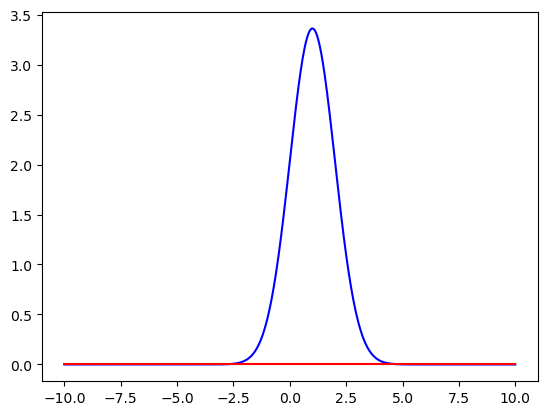

In [5]:
import numpy as np   
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation


# write the momentum operator
def momentum_operator(psi, dx):
    # create an array to hold the derivative
    d_psi = np.zeros(psi.shape, dtype=complex)
    
    # calculate the derivative
    for i in range(1, len(psi)-1):
        d_psi[i] = (psi[i+1] - psi[i-1]) / (2*dx)
    
    # calculate the derivative at the end points
    d_psi[0] = (psi[1] - psi[0]) / dx
    d_psi[-1] = (psi[-1] - psi[-2]) / dx
    
    return d_psi

dx = 1 / 1000
x_min = -10
x_max = 10
x = np.linspace(x_min, x_max, int(1 / dx))
KE_constant = 0.00001
PE_constant = 0.1

dt = 0.001
steps = 1000000
psi_x = np.exp(0.5 * -((x-1)**2))
psi_x = psi_x / np.sqrt(np.sum(np.abs(psi_x)**2) * dx)


# Create a figure for the animation
fig, ax = plt.subplots()

# Initialize two line objects (real and imaginary parts)
line1, = ax.plot(x, np.real(psi_x), 'b-')  # blue line for real part
line2, = ax.plot(x, np.imag(psi_x), 'r-')  # red line for imaginary part

# 1000 time steps
psi_x_t = np.zeros(shape=(int(steps/1000), len(psi_x)), dtype=complex)
for i in range(steps):
    H_psi = -0.5 * KE_constant * momentum_operator(momentum_operator(psi_x, dx), dx) + 0.5 * PE_constant * x ** 2 * psi_x
    psi_x = psi_x - 1j * dt * H_psi
    psi_x = psi_x / np.sqrt(np.sum(np.abs(psi_x)**2) * dx)

    if i % int(steps/1000) == 0:
        print(f"i: {i}")
        # record psi_x
        psi_x_t[int(i/int(steps/1000))] = psi_x



In [6]:
# save psi_x_t
np.save("psi_x_t_1.npy", psi_x_t)

In [2]:

def update(i):
    global psi_x
    # Calculate H_psi and update psi_x as before

    # Update the line data to reflect the new psi_x
    line1.set_ydata(np.real(psi_x_t[i]))
    line2.set_ydata(np.imag(psi_x_t[i]))

    return line1, line2,

ani = FuncAnimation(fig, update, frames=range(steps), blit=True)

plt.show()



In [3]:

def update_2(i):
    global psi_x
    line1.set_ydata(np.abs(psi_x_t[i])**2)
    return line1, 

ani = FuncAnimation(fig, update_2, frames=range(steps), blit=True)

plt.show()